In [42]:
import numpy as np
import matplotlib.pyplot as plt

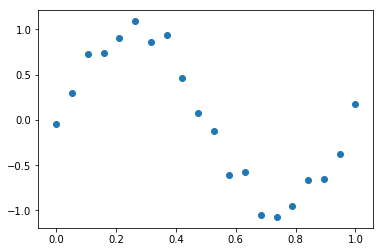

In [48]:
data_size=20
x=np.linspace(0,1,data_size)
noise=np.random.uniform(low=-1.0,high=1.0,size=data_size)*0.2
y=np.sin(2.0*np.pi*x)+noise
plt.scatter(x,y)

In [51]:
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

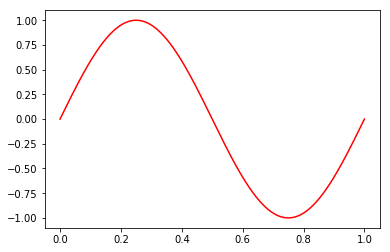

In [11]:
x_line=np.linspace(0,1,1000)
sin_x=np.sin(2.0*np.pi*x_line)
plt.plot(x_line,sin_x,'red')

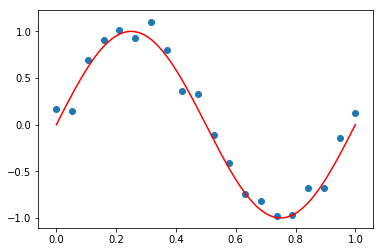

In [14]:
def plot_sin():
    plt.scatter(x,y)
    plt.plot(x_line,sin_x,"red")
plot_sin()

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
x.shape

(20,)

In [19]:
lin_reg=LinearRegression().fit(x.reshape(-1,1),y)
#-1を入れることで適切な形に変換

In [21]:
lin_reg.intercept_,lin_reg.coef_

(0.8391107778051875, array([-1.57282188]))

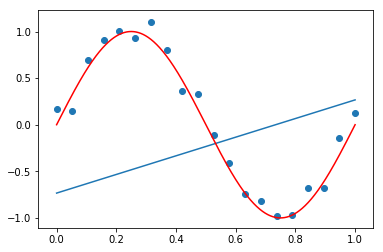

In [24]:
plt.plot(x_line,lin_reg.intercept_+lin_reg.coef_+x_line)
plot_sin()
#青線ではサインを説明できていないことがわかる

In [25]:
x_2=x**2

In [26]:
x_new=np.concatenate([x.reshape(-1,1),x_2.reshape(-1,1)],axis=1)

In [28]:
x_new
#xとxの二条の値を出力している

array([[0.        , 0.        ],
       [0.05263158, 0.00277008],
       [0.10526316, 0.01108033],
       [0.15789474, 0.02493075],
       [0.21052632, 0.04432133],
       [0.26315789, 0.06925208],
       [0.31578947, 0.09972299],
       [0.36842105, 0.13573407],
       [0.42105263, 0.17728532],
       [0.47368421, 0.22437673],
       [0.52631579, 0.27700831],
       [0.57894737, 0.33518006],
       [0.63157895, 0.39889197],
       [0.68421053, 0.46814404],
       [0.73684211, 0.54293629],
       [0.78947368, 0.6232687 ],
       [0.84210526, 0.70914127],
       [0.89473684, 0.80055402],
       [0.94736842, 0.89750693],
       [1.        , 1.        ]])

In [29]:
lin_reg_2=LinearRegression().fit(x_new,y)

In [31]:
lin_reg_2.intercept_,lin_reg_2.coef_
#二つの係数array以下に出ている

(0.8602588046461002, array([-1.70675939,  0.1339375 ]))

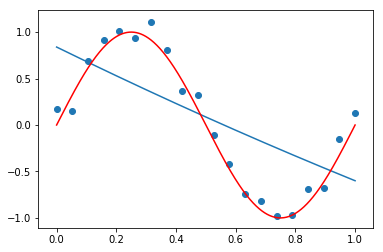

In [35]:
plt.plot(x_line,lin_reg.intercept_+lin_reg.coef_[0]*x_line+lin_reg_2.coef_[1]*x_line**2)
plot_sin()
#まだsinを適切に表せていないことがわかる

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly=PolynomialFeatures(degree=3)
poly.fit(x.reshape(-1,1))
x_poly_3=poly.transform(x.reshape(-1,1))

In [40]:
x_poly_3
#xの二乗、三乗のデータが容易に得られる

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.26315789e-02, 2.77008310e-03, 1.45793847e-04],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
       [1.00000000e+00, 1.57894737e-01, 2.49307479e-02, 3.93643388e-03],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
       [1.00000000e+00, 2.63157895e-01, 6.92520776e-02, 1.82242309e-02],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
       [1.00000000e+00, 3.68421053e-01, 1.35734072e-01, 5.00072897e-02],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
       [1.00000000e+00, 4.73684211e-01, 2.24376731e-01, 1.06283715e-01],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
       [1.00000000e+00, 5.78947368e-01, 3.35180055e-01, 1.94051611e-01],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
       [1.00000000e+00, 6.84210526e-01, 4.68144044e

In [41]:
lin_reg_3=LinearRegression().fit(x_poly_3,y)
#学習が進む

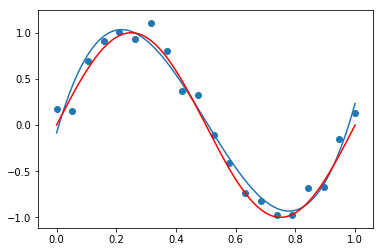

In [43]:
x_line_poly_3=poly.fit_transform(x_line.reshape(-1,1))
#predictで学習する行列とあわせるため
#元のデータ列,二乗の列、三乗の列とするため(fit_transform)
plt.plot(x_line,lin_reg_3.predict(x_line_poly_3))
plot_sin()

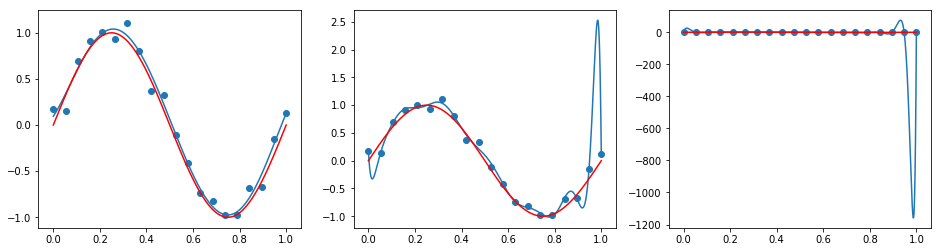

In [47]:
fig,axes=plt.subplots(1,3,figsize=(16,4))

for degree,ax in zip([5,15,25],axes):
    poly=PolynomialFeatures(degree=degree)
    x_poly=poly.fit_transform(x.reshape(-1,1))
    lin_reg=LinearRegression().fit(x_poly,y)
    x_line_poly=poly.fit_transform(x_line.reshape(-1,1))
    ax.plot(x_line,lin_reg.predict(x_line_poly))
    ax.scatter(x,y)
    ax.plot(x_line,sin_x,'red')

In [52]:
#リッジ回帰、Lasso回帰を適応していく↑は過学習が起きているため

In [56]:
import mglearn 
import pandas as pd
from sklearn.model_selection import train_test_split

In [57]:
x,y=mglearn.datasets.load_extended_boston()

In [58]:
x
#例えばxを住宅のデータ

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 2.87987643e-02]])

In [59]:
y
#ｙを家賃と考えてみる

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [62]:
#pandas を使って見やすくしよう
df_x=pd.DataFrame(x)
df_y=pd.DataFrame(y)


In [63]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.180,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.000,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.000,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.000,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.000,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
5,0.000264,0.000,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066326,0.006414,0.421118,0.644387,0.062315,0.986029,0.095353,0.009221
6,0.000921,0.125,0.271628,0.0,0.286008,0.469630,0.656025,0.402923,0.173913,0.236641,...,0.055999,0.065454,0.235866,0.069869,0.076505,0.275689,0.081666,0.993455,0.294286,0.087175
7,0.001554,0.125,0.271628,0.0,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,...,0.055999,0.065454,0.236641,0.113750,0.076505,0.276596,0.132955,1.000000,0.480684,0.231057
8,0.002303,0.125,0.271628,0.0,0.286008,0.396628,1.000000,0.450354,0.173913,0.236641,...,0.055999,0.065454,0.230513,0.184141,0.076505,0.269433,0.215232,0.948878,0.757995,0.605511
9,0.001840,0.125,0.271628,0.0,0.286008,0.468097,0.854789,0.496731,0.173913,0.236641,...,0.055999,0.065454,0.230561,0.100364,0.076505,0.269489,0.117309,0.949271,0.413219,0.179875


In [64]:
#これを線形回帰(linearregression)しよう　その前に訓練データとテストデータに分割しよう

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [66]:
lin_reg=LinearRegression().fit(x_train,y_train)

In [68]:
print(round(lin_reg.score(x_train,y_train),3))
print(round(lin_reg.score(x_test,y_test),3))

0.952
0.607


In [69]:
#↑は訓練データは適合、テストデータには適合していない
#未知のデータには当てはまりがよくない

In [70]:
from sklearn.linear_model import Ridge,Lasso

In [71]:
ridge=Ridge().fit(x_train,y_train)

In [72]:
def print_score(model):
    print(round(model.score(x_train,y_train),3))
    print(round(model.score(x_train,y_train),3))

In [73]:
print_score(ridge)

0.886
0.886


In [74]:
#過学習を防げている

In [78]:
ridge_10=Ridge(alpha=10).fit(x_train,y_train)
print_score(ridge_10)
#ridge回帰にはalphaという引数があり
#大きければ大きいほど係数の絶対値を小さくするもの
#defaultでは1

0.788
0.788


In [79]:
ridge_01=Ridge(alpha=0.1).fit(x_train,y_train)
print_score(ridge_01)

0.928
0.928


In [80]:
#では係数はいくつになっているのか

In [82]:
coefficients=pd.DataFrame({'lin_reg':lin_reg.coef_,'ridge':ridge.coef_,'ridge_10':ridge_10.coef_,'ridge_01':ridge_01.coef_})

In [84]:
coefficients

,lin_reg,ridge,ridge_10,ridge_01
0,-412.710947,-1.413684,-0.811610,-2.333007
1,-52.243207,-1.556619,0.647609,-5.441929
2,-131.898815,-1.465434,-0.809783,-6.128655
3,-12.004136,-0.126616,0.311335,-0.778525
4,-15.510713,-0.079119,-0.684624,1.291530
5,28.716334,8.331610,4.387976,19.022284
6,54.704099,0.254975,-0.147554,4.358647
7,-49.534666,-4.941457,-2.442141,-11.191107
8,26.582393,3.898623,0.845915,9.555397
9,37.062032,-1.058661,-1.147275,-0.748671


In [85]:
#alphaの見極めが大事

In [89]:
lasso=Lasso().fit(x_train,y_train)

In [90]:
print_score(lasso)

0.293
0.293


In [91]:
#テストデータに対してどちらも低い
#係数のほとんどを０にしてしまっている

In [94]:
lasso_001=Lasso(alpha=0.01).fit(x_train,y_train)
print_score(lasso_001)

0.896
0.896


C:\Users\mkou0\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [95]:
#小さすぎると精度にもんだいがあるとのことなので
lasso_001=Lasso(alpha=0.01,max_iter=10000).fit(x_train,y_train)
print_score(lasso_001)

0.896
0.896


In [96]:
#係数の確認をしよう

In [104]:
cofficients_lasso=pd.DataFrame({'lin_reg':lin_reg.coef_,
                           'lasso':lasso.coef_,
                           'lasso001':lasso_001.coef_                  })
cofficients_lasso

,lin_reg,lasso,lasso001
0,-412.710947,-0.000000,-0.000000
1,-52.243207,0.000000,-0.000000
2,-131.898815,-0.000000,-0.000000
3,-12.004136,0.000000,0.000000
4,-15.510713,-0.000000,-0.000000
5,28.716334,0.000000,0.000000
6,54.704099,-0.000000,-0.000000
7,-49.534666,0.000000,-1.432605
8,26.582393,-0.000000,10.947712
9,37.062032,-0.000000,0.000000


In [105]:
#lassoは学習不足、lasso001は０になっているのもあるけど学習できている

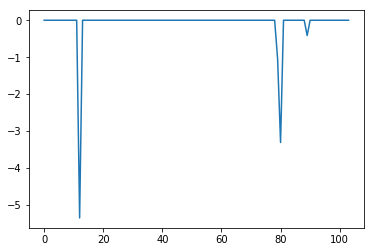

In [119]:
plt.plot(coefficients.lasso)

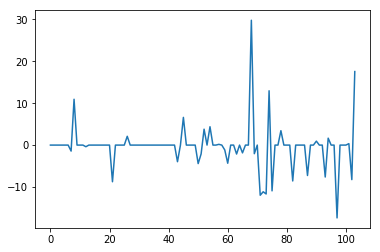

In [120]:
plt.plot(coefficients.lasso001)